# Module 7 Assignment

A few things you should keep in mind when working on assignments:

1. Run the first code cell to import modules needed by this assignment before proceeding to problems.
2. Make sure you fill in any place that says `# YOUR CODE HERE`. Do not write your answer anywhere else other than where it says `# YOUR CODE HERE`. Anything you write elsewhere will be removed or overwritten by the autograder.
3. Each problem has an autograder cell below the answer cell. Run the autograder cell to check your answer. If there's anything wrong in your answer, the autograder cell will display error messages.
4. Before you submit your assignment, make sure everything runs as expected. Go to the menubar, select Kernel, and Restart & Run all. If the notebook runs through the last code cell without an error message, you've answered all problems correctly.
5. Make sure that you save your work (in the menubar, select File → Save and CheckPoint).

-----

# Run Me First!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from nose.tools import assert_equal, assert_almost_equal, assert_true, assert_is_instance

# We do this to ignore warnings
import warnings
warnings.filterwarnings("ignore")

---
# Prepare Breast Cancer Data

In this assignment we will use the breast cancer dataset to perform cluster finding. Before we attempt to build models, we first prepare the data.

Please run the next two code cells before proceeding to Problem 1.



In [2]:
from sklearn.preprocessing import LabelEncoder
#Load breast cancer dataset
df = pd.read_csv('data/breast-cancer-wisconsin.csv')
data = df[['clump thickness', 'uniformity cell size', 'uniformity cell shape', 'marginal adhesion', 'epithelial cell size', 'bare nuclei', 'bland chromatin', 'normal nucleoli', 'mitoses']]
label = LabelEncoder().fit_transform(df['class'])

data.sample()

,clump thickness,uniformity cell size,uniformity cell shape,marginal adhesion,epithelial cell size,bare nuclei,bland chromatin,normal nucleoli,mitoses
269,1,1,1,1,2,1,3,1,1


---
# Problem 1: Standardize Features

For this problem you will use the DataFrame **data** created above.

To solve this problem do the following:
- Use `StandardScaler` to standardize `data` and assign normalized data to variable **data_ss**.

After this problem, there is a new variable **data_ss** defined.

---

In [3]:
from sklearn.preprocessing import StandardScaler
### BEGIN SOLUTION
data_ss = StandardScaler().fit_transform(data)
### END SOLUTION

In [4]:
assert_almost_equal(data_ss[0,0], 0.19790469484926235, msg='data_ss is not correct')
assert_almost_equal(data_ss[0,-1], -0.3483997074310662, msg='data_ss is not correct')
print('Sample Standardized data:')
print(data_ss[:2])

Sample Standardized data:
[[ 0.19790469 -0.70221201 -0.74177362 -0.63936553 -0.5556085  -0.69885309
  -0.18182716 -0.61292736 -0.34839971]
 [ 0.19790469  0.27725185  0.26278299  0.75803177  1.69516613  1.77286724
  -0.18182716 -0.28510482 -0.34839971]]


---
# Problem 2: Fit KMeans Model and Calculate Evaluation Metrics

Create and fit a KMeans model with breast cancer dataset. Calculate the Adjusted Rand Index and Silhouette score of the model.

For this problem, use `data_ss` and `label` created above.

To solve this problem do the following:
 - Create a `KMeans` model **k_means**. Set `n_clusters` to 2, `n_init` to 10, `random_state` to 23.
 - Fit the KMeans model on `data_ss`.
 - Apply k_means `predict` function on data_ss to get predicted clusters, assign it to variable **pred_clusters**.
 - Use `adjusted_rand_score` in `metrics` module with label and pred_clusters to calculate the Adjusted Rand Index and set the score to variable **ari_score**.
 - Use `silhouette_score` in `metrics` module with data_ss and pred_clusters to calculate the Silhouette score. Assign the score to variable **s_score**.

After this problem, there will be a fitted KMeans model **k_means**, as well as __ari_score__ and **s_score** defined.

---

In [5]:
from sklearn.cluster import KMeans
from sklearn import metrics

### BEGIN SOLUTION
# We build our model assuming three clusters
k_means = KMeans(n_clusters=2, n_init=10, random_state=23)
# We fit our original data
k_means.fit(data_ss)
pred_clusters = k_means.predict(data_ss)
ari_score = metrics.adjusted_rand_score(label, pred_clusters)
s_score = metrics.silhouette_score(data_ss, pred_clusters)
### END SOLUTION

In [6]:
assert_equal(type(k_means), type(KMeans()), msg="k_means is a KMeans model")
assert_equal(k_means.get_params()['n_clusters'], 2, msg="k_means is not created with n_clusters = 2")
assert_equal(k_means.get_params()['n_init'], 10, msg="k_means is not created with n_init = 10")
assert_equal(k_means.get_params()['random_state'], 23, msg="k_means is not created with random_state = 23")
assert_true(k_means.inertia_>2700, msg="k_means is not fit properly")
assert_true(ari_score>0.8, msg='Adjusted Rand Index is not correct')
assert_true(s_score>0.57, msg='Silhouette score is not correct')
print(f"Adjusted Rand Index of Kmeans: {ari_score:5.3f}")
print(f"Silhouette Score of Kmeans: {s_score:5.3f}")

Adjusted Rand Index of Kmeans: 0.836
Silhouette Score of Kmeans: 0.573


---

# Problem 3: Prepare Data for k-distance Graph

Prepare data to plot k-distance graph to determine proper `eps` value for a DBSCAN model.

For this problem you will use **data_ss** created in problem 1.

To solve this problem do the following:
- Create `NearestNeighbors` model **nnb**. Set `n_neighbors` to 2.
- Fit nnb with data_ss.
- Use nnb function `kneighbors` with `data_ss` to calculate the distnace to the nearest point of each data point. Assign return values to variable **distances** and __indices__.

After this problem, there is a trained model **nnb** defined, as well as numpy array of distance to nearest points, **distances**. We will use distances to plot the k-distance graph in the autograder cell.

-----

In [7]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

### BEGIN SOLUTION
#get 2 nearest neighbors of each points
nnb = NearestNeighbors(n_neighbors=2)
nnb.fit(data_ss)
#calculate average distances to the 17 neighbors of each point
distances, indices = nnb.kneighbors(data_ss)
### END SOLUTION

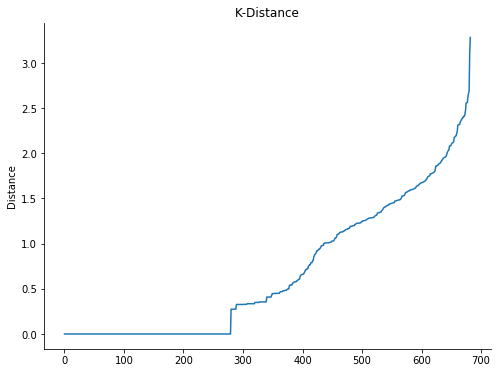

In [8]:
assert_equal(type(nnb), type(NearestNeighbors()), msg="nnb is a NearestNeighbors model")
assert_equal(nnb.get_params()['n_neighbors'], 2, msg="nnb is not created with n_neighbors = 2")
assert_almost_equal(distances[1, 1], 1.00846778, msg="distances are not correct")
assert_almost_equal(distances[2, 1], 0.27463559, msg="distances are not correct")

#plot k-distance graph
import matplotlib.pyplot as plt
#sort by distance from low to high and plot
fig, ax = plt.subplots(figsize=(8, 6))
distances = distances[:,1]
distances = np.sort(distances)
plt.plot(distances)
plt.title("K-Distance")
plt.ylabel("Distance")
sns.despine()

---

# Problem 4: Create and Fit DBSCAN model

Create and fit a DBSCAN model with breast cancer dataset.

For this problem, you will use data_ss created in problem 1.

To solve this problem do the following:

 - Create a `DBSCAN` model **dbscan**. Set `eps` to 2.0, `min_samples` to 20.
 - Fit the `DBSCAN` model on `data_ss`.

After this problem, there will be a fitted DBSCAN model **dbscan** defined.


-----

In [9]:
from sklearn.cluster import DBSCAN

### BEGIN SOLUTION
dbscan = DBSCAN(eps=2.0, min_samples=20)
dbscan.fit(data_ss)
### END SOLUTION

DBSCAN(algorithm='auto', eps=2.0, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=20, n_jobs=None, p=None)

In [10]:
assert_equal(type(dbscan), type(DBSCAN()), msg="dbscan is not a DBSCAN model")
assert_equal(dbscan.get_params()['eps'], 2.0, msg="dbscan is not created with eps = 2.0")
assert_equal(dbscan.get_params()['min_samples'], 20, msg="dbscan is not created with min_samples = 20")
assert_equal(dbscan.components_.shape[0], 444, msg='dbscan is not fit properly')
print(f'Cluster labels: {np.unique(dbscan.labels_)}')

Cluster labels: [-1  0  1]


# Problem 5: Calculate Clustering Metrics for DBSCAN Model

Compute two clustering metrics, Adjusted Rand Index and Silhouette, of the DBSCAN model created in problem 4.

For this problem, you will use `data_ss`, `label` and `dbscan` created above.

To solve this problem do the following:

- Get predicted clusters from dbscan's `labels_` attribute, assign to variable **pred_clusters**.
- Use `adjusted_rand_score` in `metrics` module with label and pred_clusters to calculate the Adjusted Rand Index and set the score to variable **ari_score_db**.
- Use `silhouette_score` in `metrics` module with data_ss and pred_clusters to calculate the Silhouette score. Assign the score to variable **s_score_db**.

After this problem, there will be two new variables, **ari_score_db** and __s_score_db__ defined.

-----

In [11]:
from sklearn import metrics

### BEGIN SOLUTION
pred_clusters = dbscan.labels_
ari_score_db = metrics.adjusted_rand_score(label, pred_clusters)
s_score_db = metrics.silhouette_score(data_ss, pred_clusters)
### END SOLUTION

In [12]:
assert_true(ari_score_db>0.73, msg='Adjusted Rand Index is not correct')
assert_true(s_score_db>0.48, msg='Silhouette score is not correct')
print(f"Adjusted Rand Index: {ari_score_db:5.3f}")
print(f"Silhouette Score: {s_score_db:5.3f}")

Adjusted Rand Index: 0.732
Silhouette Score: 0.485
